# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.

number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate_mice = combined_data.loc["Mouse ID", :].duplicated().unique()
# help from learning assistant ryan

duplicate_mice = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_info = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# learning assistant angel

combined_clean = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
combined_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Checking the number of mice in the clean DataFrame.
# learning assistant angel

combined_clean_mice = len(combined_clean['Mouse ID'].unique())
combined_clean_mice

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stddev = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
        'Mean Tumor Volume': tumor_vol_mean,
        'Median Tumor Volume': tumor_vol_median,
        'Tumor Volume Variance': tumor_vol_variance,
        'Tumor Volume Std Dev': tumor_vol_stddev,
        'Tumor Volume Std Err': tumor_vol_sem
        })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/
# https://towardsdatascience.com/all-about-pandas-groupby-explained-with-25-examples-494e04a8ef56 (had to sign up for email marketing to access...)

advanced_summary_aggregate = combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
advanced_summary_aggregate

#advanced_summary_aggregate = advanced_method({
#    "Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']
#})
#advanced_summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

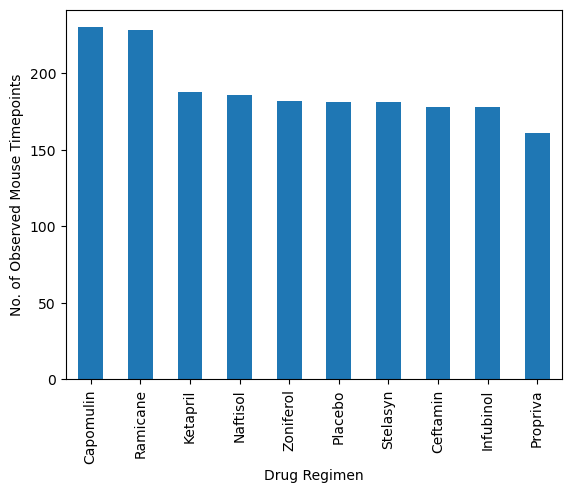

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#make dataframe, then xxx..
#  df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#  ax = df.plot.bar(x='lab', y='val', rot=0)

bar_y_value = combined_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

#bar_pandas = pd.DataFrame(bar_y_value)
#    'drugs':combined_clean['Drug Regimen'].unique(),
#    'counts':bar_y_value
#})
#bar_df

bar_y_value.plot.bar(ylabel="No. of Observed Mouse Timepoints")
plt.show()

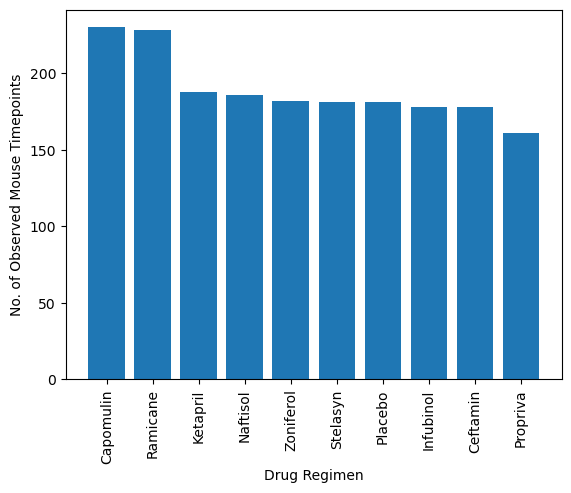

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#x_axis = bar_y_value['Drug Regimen'].copy()
#y_axis = combined_data.groupby("Drug Regimen")["Mouse ID", "Timepoint"].count()

counts = combined_data['Drug Regimen'].value_counts()
#counts

plt.bar(counts.index.values, counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Observed Mouse Timepoints")
plt.show()

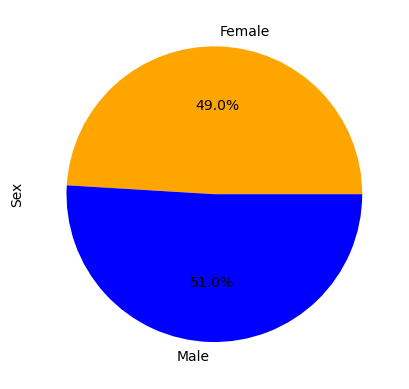

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_y_value = combined_clean.groupby('Sex')['Sex'].count()
#pie_y_value

pie_y_value.plot.pie(colors=["orange", "blue"], autopct="%1.1f%%")
plt.show()

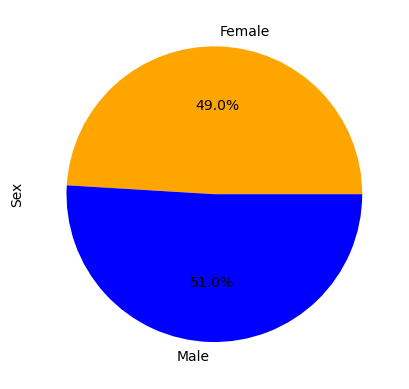

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#x_axis = bar_y_value['Drug Regimen'].copy()
#y_axis = combined_data.groupby("Drug Regimen")["Mouse ID", "Timepoint"].count()


plt.pie(pie_y_value, labels= pie_y_value.index.values, autopct="%1.1f%%", colors=["orange", "blue"])
#plt.xlabel = "Sex"
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_volume = final_tumor_volume.reset_index()

# learning assistant angel
final_tumor_volume_merged = final_tumor_volume.merge(combined_clean, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume_merged.head()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,63.440686,1.0,Stelasyn,Female,16.0,29.0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#learning assistant lindsay helped me come up with and add to the formula and the print(f"")
for t in treatment:
    treat_list = final_tumor_volume_merged.loc[final_tumor_volume_merged["Drug Regimen"] == t, "Tumor Volume (mm3)"]
    tumor_volume_data.append(treat_list)

    quartiles = treat_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = treat_list.loc[(treat_list < lower_bound) | (treat_list > upper_bound)]

    print(f"{t}'s potential outliers: {outlier}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


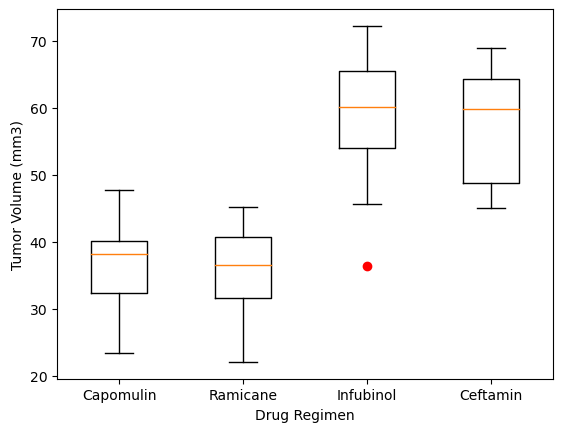

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# https://stackoverflow.com/questions/25075023/matplotlib-boxplot-outlier-color-change-if-keyword-sym-is-used#:~:text=Like%20BrenBarn%20and%20Joop%20correctly,green%20x's%20in%20the%20plot.

plt.boxplot(tumor_volume_data, sym = 'r')

# instructor eli
plt.xticks([1, 2, 3, 4], treatment) 

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#print(tumor_volume_data)

#student_df_4.set_axis(["A", "B", "C"], axis="columns", inplace=True)
#student_df_1.rename(
#    columns={"ID": "Student_ID", "name": "First_Name", "grade": "Average_Grade"},
#    inplace=True,
#.rename(columns={"1": "treatment[0]", "2": "treatment[1]", "3": "treatment[2]", "4": "treatment[3]"})

## Line and Scatter Plots

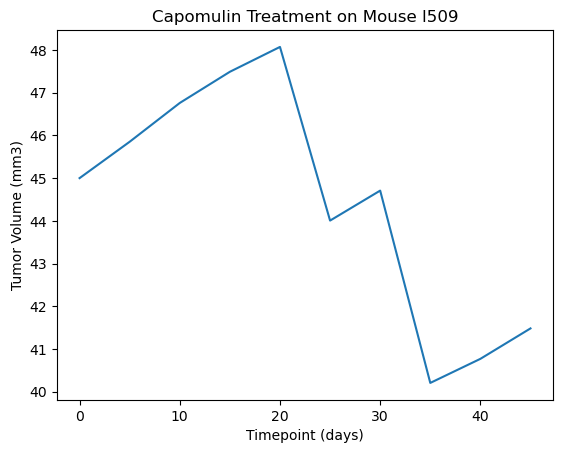

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (example uses l509)

single_mouse = combined_clean.loc[combined_clean['Mouse ID'] == "l509", :]
single_mouse_clean = single_mouse[["Timepoint", "Tumor Volume (mm3)"]]
#single_mouse_clean

plt.plot(single_mouse_clean["Timepoint"], single_mouse_clean["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment on Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

#duplicate_mice_info = combined_data.loc[combined_data["Mouse ID"] == "g989", :]


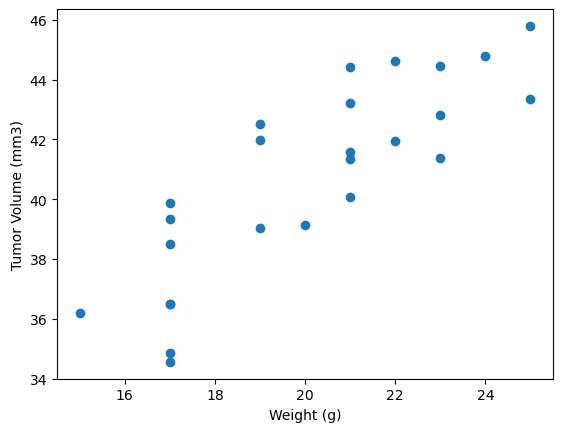

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight_vs_tumor_volume = combined_clean.loc[combined_clean['Drug Regimen'] == "Capomulin"]
#weight_vs_tumor_volume

weight_vs_tumor_volume_clean = weight_vs_tumor_volume.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
#weight_vs_tumor_volume_clean

plt.scatter(weight_vs_tumor_volume_clean["Weight (g)"], weight_vs_tumor_volume_clean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

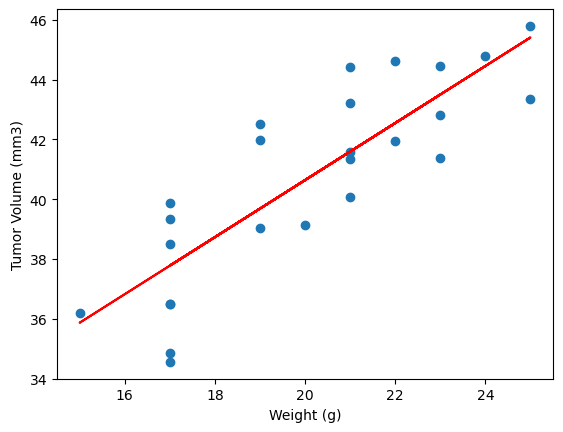

In [45]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = weight_vs_tumor_volume_clean["Weight (g)"]
y_values = weight_vs_tumor_volume_clean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# for me, just wanted to see how this worked
# plt.annotate(line_eq,(20,36),fontsize = 15, color = "red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()